In [1]:
# pip install diagrams
from diagrams import Cluster, Diagram
from diagrams.c4 import \
    Container, \
    Database, \
    Person, \
    Relationship, \
    System, \
    SystemBoundary


SHOW_DIAGRAMS = False


def basic_block(label, description='', **kwargs):
    container_kwargs = {
        'description': description,
        'type': '',
        'height': '0.6'
    }
    container_kwargs.update(kwargs)
    return Container(label, **container_kwargs)


def database(label, **kwargs):
    database_kwargs = {
        'height': '0.6'
    }
    database_kwargs.update(kwargs)
    return Database(label, **database_kwargs)


class PresentationDiagram(Diagram):
    def __init__(self, filename, **kwargs):
        graph_attr = {
            'pad': '0.25',
        }
        graph_attr.update(kwargs.get('graph_attr', {}))
        super_kwargs = {
            'filename': filename,
            'outformat': 'svg',
            'show': SHOW_DIAGRAMS,
            'graph_attr': graph_attr,
        }
        super_kwargs.update(kwargs)
        super().__init__(**super_kwargs)         

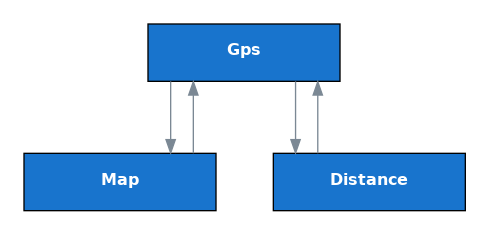

In [2]:
polling_diag = PresentationDiagram('polling', direction="TB")
with polling_diag:
    gps = basic_block('Gps')
    component1 = basic_block('Map')
    component2 = basic_block('Distance')
        
    component1 >> gps >> component1
    component2 >> gps >> component2
polling_diag

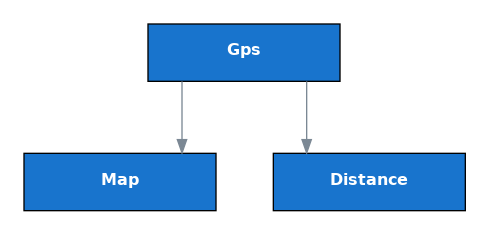

In [3]:
push_diagram = PresentationDiagram('push', direction='TB')
with push_diagram:
    gps = basic_block('Gps')
    component1 = basic_block('Map')
    component2 = basic_block('Distance')
        
    gps >> component1
    gps >> component2
push_diagram

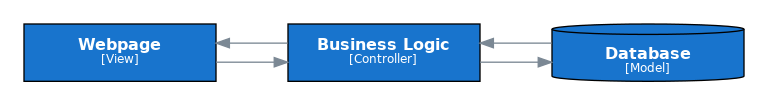

In [4]:
generic_mvc_diagram = PresentationDiagram('generic_mvc', direction='LR')
with generic_mvc_diagram:
    mvc_model = database('Database', type='Model')
    server_side_logic = basic_block('Business Logic', type='Controller')
    web_page = basic_block('Webpage', type='View')

    web_page >> server_side_logic
    web_page << server_side_logic

    server_side_logic >> mvc_model
    server_side_logic << mvc_model       
        
generic_mvc_diagram

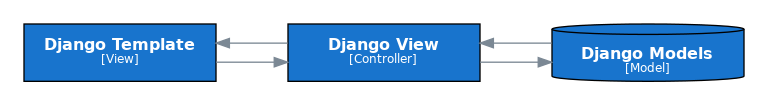

In [5]:
django_mvc_diagram = PresentationDiagram('django_mvc')
with django_mvc_diagram:
    dj_database = database('Django Models', type='Model')
    dj_view = basic_block('Django View', type='Controller')
    dj_template = basic_block('Django Template', type='View')

    dj_template >> dj_view
    dj_template << dj_view

    dj_view >> dj_database
    dj_view << dj_database

django_mvc_diagram